MohammadReza Javaheri 610300038

The code implements a genetic algorithm to solve the N-Queens problem, where N is the size of the chessboard and the number of queens that need to be placed on the board without any two queens threatening each other. The genetic algorithm is a metaheuristic optimization algorithm inspired by the process of natural selection. It works by starting with a population of candidate solutions (chromosomes) and iteratively improving them by generating new offspring through crossover and mutation operations. The best individuals in each generation (elite population) are selected to reproduce and pass on their genetic material to the next generation.

The code starts by defining a Board class that represents a solution (chromosome) to the N-Queens problem. The constructor of the Board class initializes a random permutation of integers from 0 to N-1, where each integer represents the row position of a queen in a column. The cal_conflicts method of the Board class calculates the number of pairs of queens that threaten each other. The get_conflicts method returns the number of conflicts for a Board instance.

The two_point_conflicts method of the Board class calculates the change in conflicts when two queens at positions alpha and beta are swapped. This method is used in the local search phase to improve the fitness of a Board instance by swapping pairs of queens to reduce the number of conflicts.

The fit_local_search method of the Board class performs a local search to improve the fitness of a Board instance by iteratively swapping pairs of queens to reduce the number of conflicts. The method randomly selects two positions on the board (alpha and beta) and swaps the queens at those positions if it reduces the number of conflicts. The process is repeated for a fixed number of iterations.

The crossover function takes two Board instances (parents) and generates a new Board instance (child) by performing a crossover operation. The crossover operation randomly selects a subsequence of queen positions from the mother chromosome and places them in the corresponding positions of the father chromosome. The remaining queen positions are filled in the order they appear in the father chromosome, excluding the positions already present in the child chromosome. The resulting child chromosome is then returned as a new Board instance.

The makeChildren function takes a list of parent Board instances and the desired number of offspring and generates a list of new Board instances (children) by repeatedly calling the crossover function with randomly selected parent pairs.

The genetic_algorithm function is the main driver function that implements the genetic algorithm. It starts by generating an initial population of Board instances (chromosomes). The population is sorted by fitness (number of conflicts), and the best individuals (elite population) are selected to pass on their genetic material to the next generation. The function then enters a loop where it generates new offspring by calling the makeChildren function and adds them to the population. The population is sorted again by fitness, and the worst individuals are removed to keep the population size constant. The fit_local_search method is called for each Board instance in the population to improve their fitness. The loop continues until a Board instance with zero conflicts is found or until the improvement in fitness is not significant. If the fitness has not improved for a certain number of iterations, the population size is increased to avoid getting stuck in a local minimum.

The code also includes a plot method of the Board class that visualizes the board and the position of the queens using the matplotlib library.

Overall, this code implements a simple genetic algorithm to solve the n-queens problem. It starts with a population of two chromosomes and iteratively improves them using local search and recombination with child chromosomes. The algorithm stops when a chromosome with zero conflicts is found or when the improvement stalls for a certain number of iterations.

In [ ]:
# import necessary libraries
import random
import matplotlib as plt
import numpy as np
import pandas as pd

# function that creates a child board by crossing over the father and mother boards
def crossover(father, mother):
    child = Board(father.size)  # creates a child board with the same size as father board
    start = random.randint(0, father.size - 2)  # randomly selects a start position for the crossover
    end = random.randint(start, father.size - 1)  # randomly selects an end position for the crossover
    temp = mother.queens[start:end + 1]  # selects the subsequence between start and end positions from mother board
    counter = 0
    # loops over father board and inserts the remaining elements in the appropriate position in the child board
    for i in range(len(father.queens)):
        if (father.queens[i] not in temp):
            if (counter < start):
                temp = [i] + temp
            else:
                temp += [i]
            counter += 1
    child.cal_conflicts()  # calculates the number of conflicts in the new child board
    return child


# class that represents a board in the N-Queens problem
class Board:
    def __init__(self, size):
        self.size = size  # size of the board
        self.queens = list(range(size))  # generates a list with the position of the queens
        random.shuffle(self.queens)  # shuffles the list to create a new random position of the queens
        self.cal_conflicts()  # calculates the number of conflicts in the new board

    def get_conflicts(self):
        return self.conflicts  # returns the number of conflicts in the current board

    def cal_conflicts(self):
        conflicts = 0
        # loops over each pair of queens in the board and counts the number of conflicts
        for i in range(self.size):
            for j in range(i + 1, self.size):
                if abs(self.queens[i] - self.queens[j]) == abs(i - j):
                    conflicts += 1
        self.conflicts = conflicts  # stores the number of conflicts in the current board

    # calculates the number of conflicts after exchanging two queens in the board
    def two_point_conflicts(self, alpha, beta):
        conflicts = 0
        for i in range(self.size):
            if (i == alpha or i == beta):
                continue
            if abs(self.queens[i] - self.queens[alpha]) == abs(i - alpha):
                conflicts -= 1
            if abs(self.queens[i] - self.queens[beta]) == abs(i - beta):
                conflicts -= 1
            if abs(self.queens[i] - self.queens[alpha]) == abs(i - beta):
                conflicts += 1
            if abs(self.queens[i] - self.queens[beta]) == abs(i - alpha):
                conflicts += 1
        return conflicts

    # performs a local search to find a better position of queens and reduces the number of conflicts
    def fit_local_search(self):
        conflicts = self.get_conflicts()
        for _ in range(300):
            alpha, beta = random.sample(range(self.size), 2)
            if alpha == beta:
                continue
            delta_conflicts = self.two_point_conflicts(alpha, beta)
            if delta_conflicts >= 0:
                continue
            self.queens[alpha], self.queens[beta] = self.queens[beta], self.queens[alpha]
            conflicts += delta_conflicts
        self.conflicts = conflicts

    # Define the "less than" operator for the Board class
    def __lt__(self, other):
        return self.get_conflicts() < other.get_conflicts()

    # Plot the board
    def plot(self):
        n=self.size
        table = [[(j+i)%2 for j in range(n)]for i in range(n)]
        for i in range(self.size):
            table[i][self.queens[i]]=5
        plt.pyplot.figure(figsize=(n,n))
        plt.pyplot.imshow(table,cmap='gray')
        
        
# Generate a list of children by performing crossover on pairs of parents
def makeChildren(parents,size):
    return [crossover((prs:=random.sample(parents,2))[0],prs[1]) for _ in range(size)]



In [ ]:
# Perform a genetic algorithm to solve the N-queens problem
def genetic_algorithm(population_size, board_size):
    # Create an initial population of boards of the given size
    population = sorted([Board(board_size) for _ in range(population_size)])
    
    # Initialize global lists for tracking the minimum and mean number of conflicts
    global mins
    global means
    mins=[]
    means=[]
    
    # Initialize a counter to keep track of how many iterations have passed with the same minimum number of conflicts
    counter=0
    
    # Loop until a board with zero conflicts is found
    while  population[0].get_conflicts()!=0:
        # Increment the counter if the minimum number of conflicts has not changed in the last 20 iterations
        if( len(mins)>20 and mins[-1]==mins[-2]):
            counter+=1
        else:
            counter=0
        
        # Print the current minimum and maximum number of conflicts in the population
        print(population[0].conflicts,population[-1].conflicts)
        
        # Create children from the current population
        if(population_size>2 or population[0].get_conflicts()<30):
            children=makeChildren(population,population_size*2)
        else:
            children=[]
        
        # If the minimum number of conflicts has not changed in the last two iterations or the counter has exceeded 20, increase the population size
        if((len(mins)>2 and mins[0]==mins[-1] ) or counter>20):
            counter=0
            population_size+=1
            print(population_size)
        
        # Add the children to the population and sort the population by fitness, keeping only the top population_size individuals
        population=sorted(population+children)[:population_size]
        
        # Perform local search on each individual in the population
        for i in population:
            i.fit_local_search()
        
        # Add the minimum and mean number of conflicts to the respective lists
        mins.append(population[0].conflicts)
        means.append(int(sum(map(lambda x:x.conflicts,population)))/len(population))
    
    # Return the individual with the minimum number of conflicts
    return population[0]

In this experiment, the genetic algorithm code was run for a problem of size n=100. The algorithm was able to find a solution with zero conflicts in 1.5 seconds

In [ ]:
res1=genetic_algorithm(2,100)

In [ ]:
res1.get_conflicts()

0

The chart displays the minimum number of conflicting positions and the mean number of conflicts between chromosomes at each step of the genetic algorithm. As the algorithm progresses, the number of conflicts decreases, indicating that the chromosomes are improving and converging towards a solution. 

<AxesSubplot:>

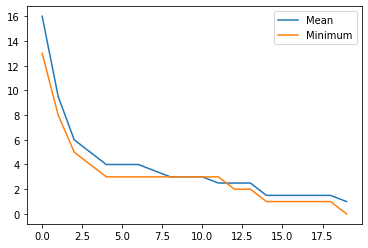

In [ ]:
data_fram = pd.DataFrame({'Mean':means, 'Minimum':mins})
data_fram.plot()


N-Queens Board Visualization for n=100

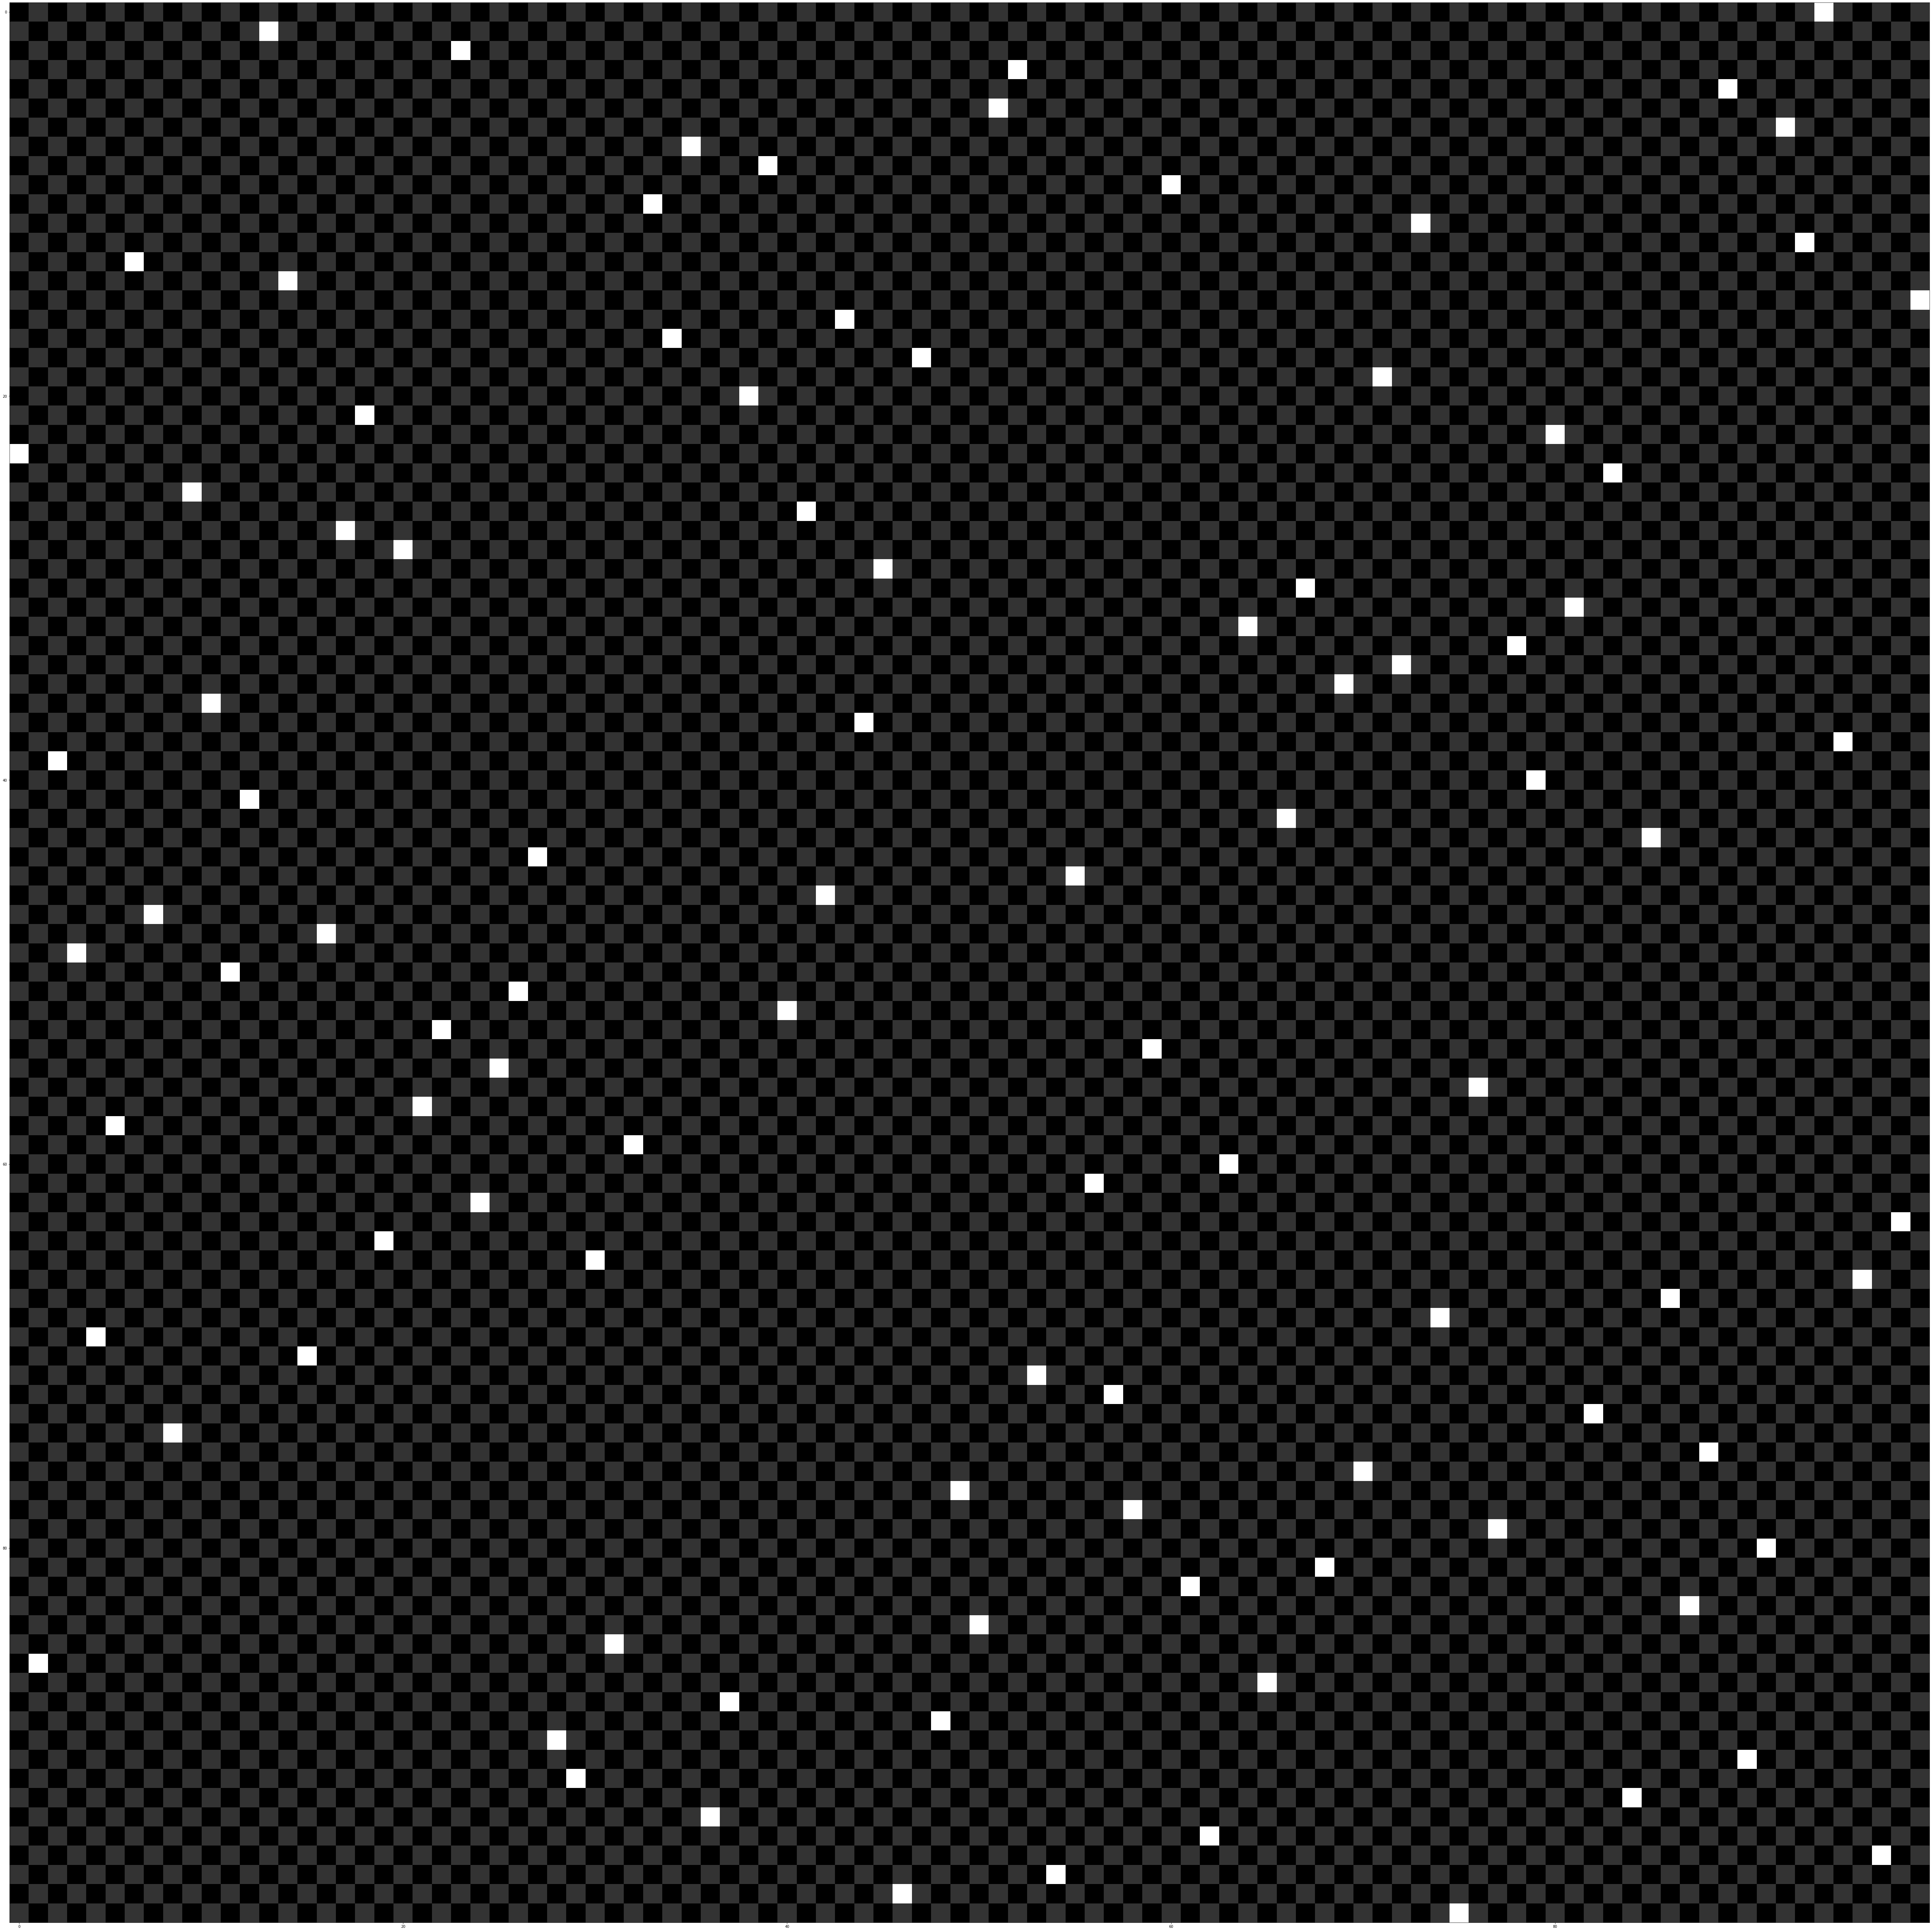

In [ ]:
res1.plot()

try with n=200
The algorithm was able to find a solution with zero conflicts in 12.3 seconds

In [ ]:
res2=genetic_algorithm(2,200)

<AxesSubplot:>

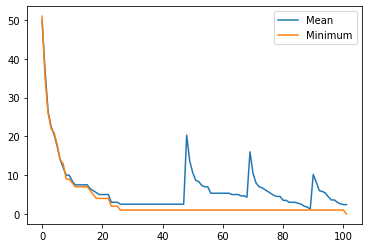

In [ ]:
data_fram = pd.DataFrame({'Mean':means, 'Minimum':mins})
data_fram.plot()

try with n=500
The algorithm was able to find a solution with zero conflicts in 128 seconds

In [ ]:
res3=genetic_algorithm(2,500)

<AxesSubplot:>

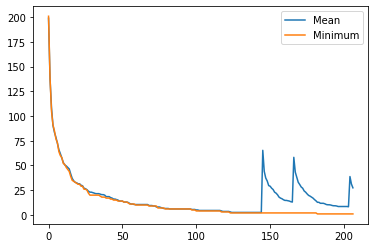

In [ ]:
data_fram = pd.DataFrame({'Mean':means, 'Minimum':mins})
data_fram.plot()